In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

In [5]:
Auto = pd.read_csv('~/Independent Study /Auto.csv')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
print(Auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:


Auto['mpg01'] = mpg01

In [10]:
mpg_median = Auto['mpg'].median()

Auto['mpg01'] = (Auto['mpg'] > mpg_median).astype(int)

print(Auto)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  mpg01  
0         1  chevrolet chev


(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scat- terplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


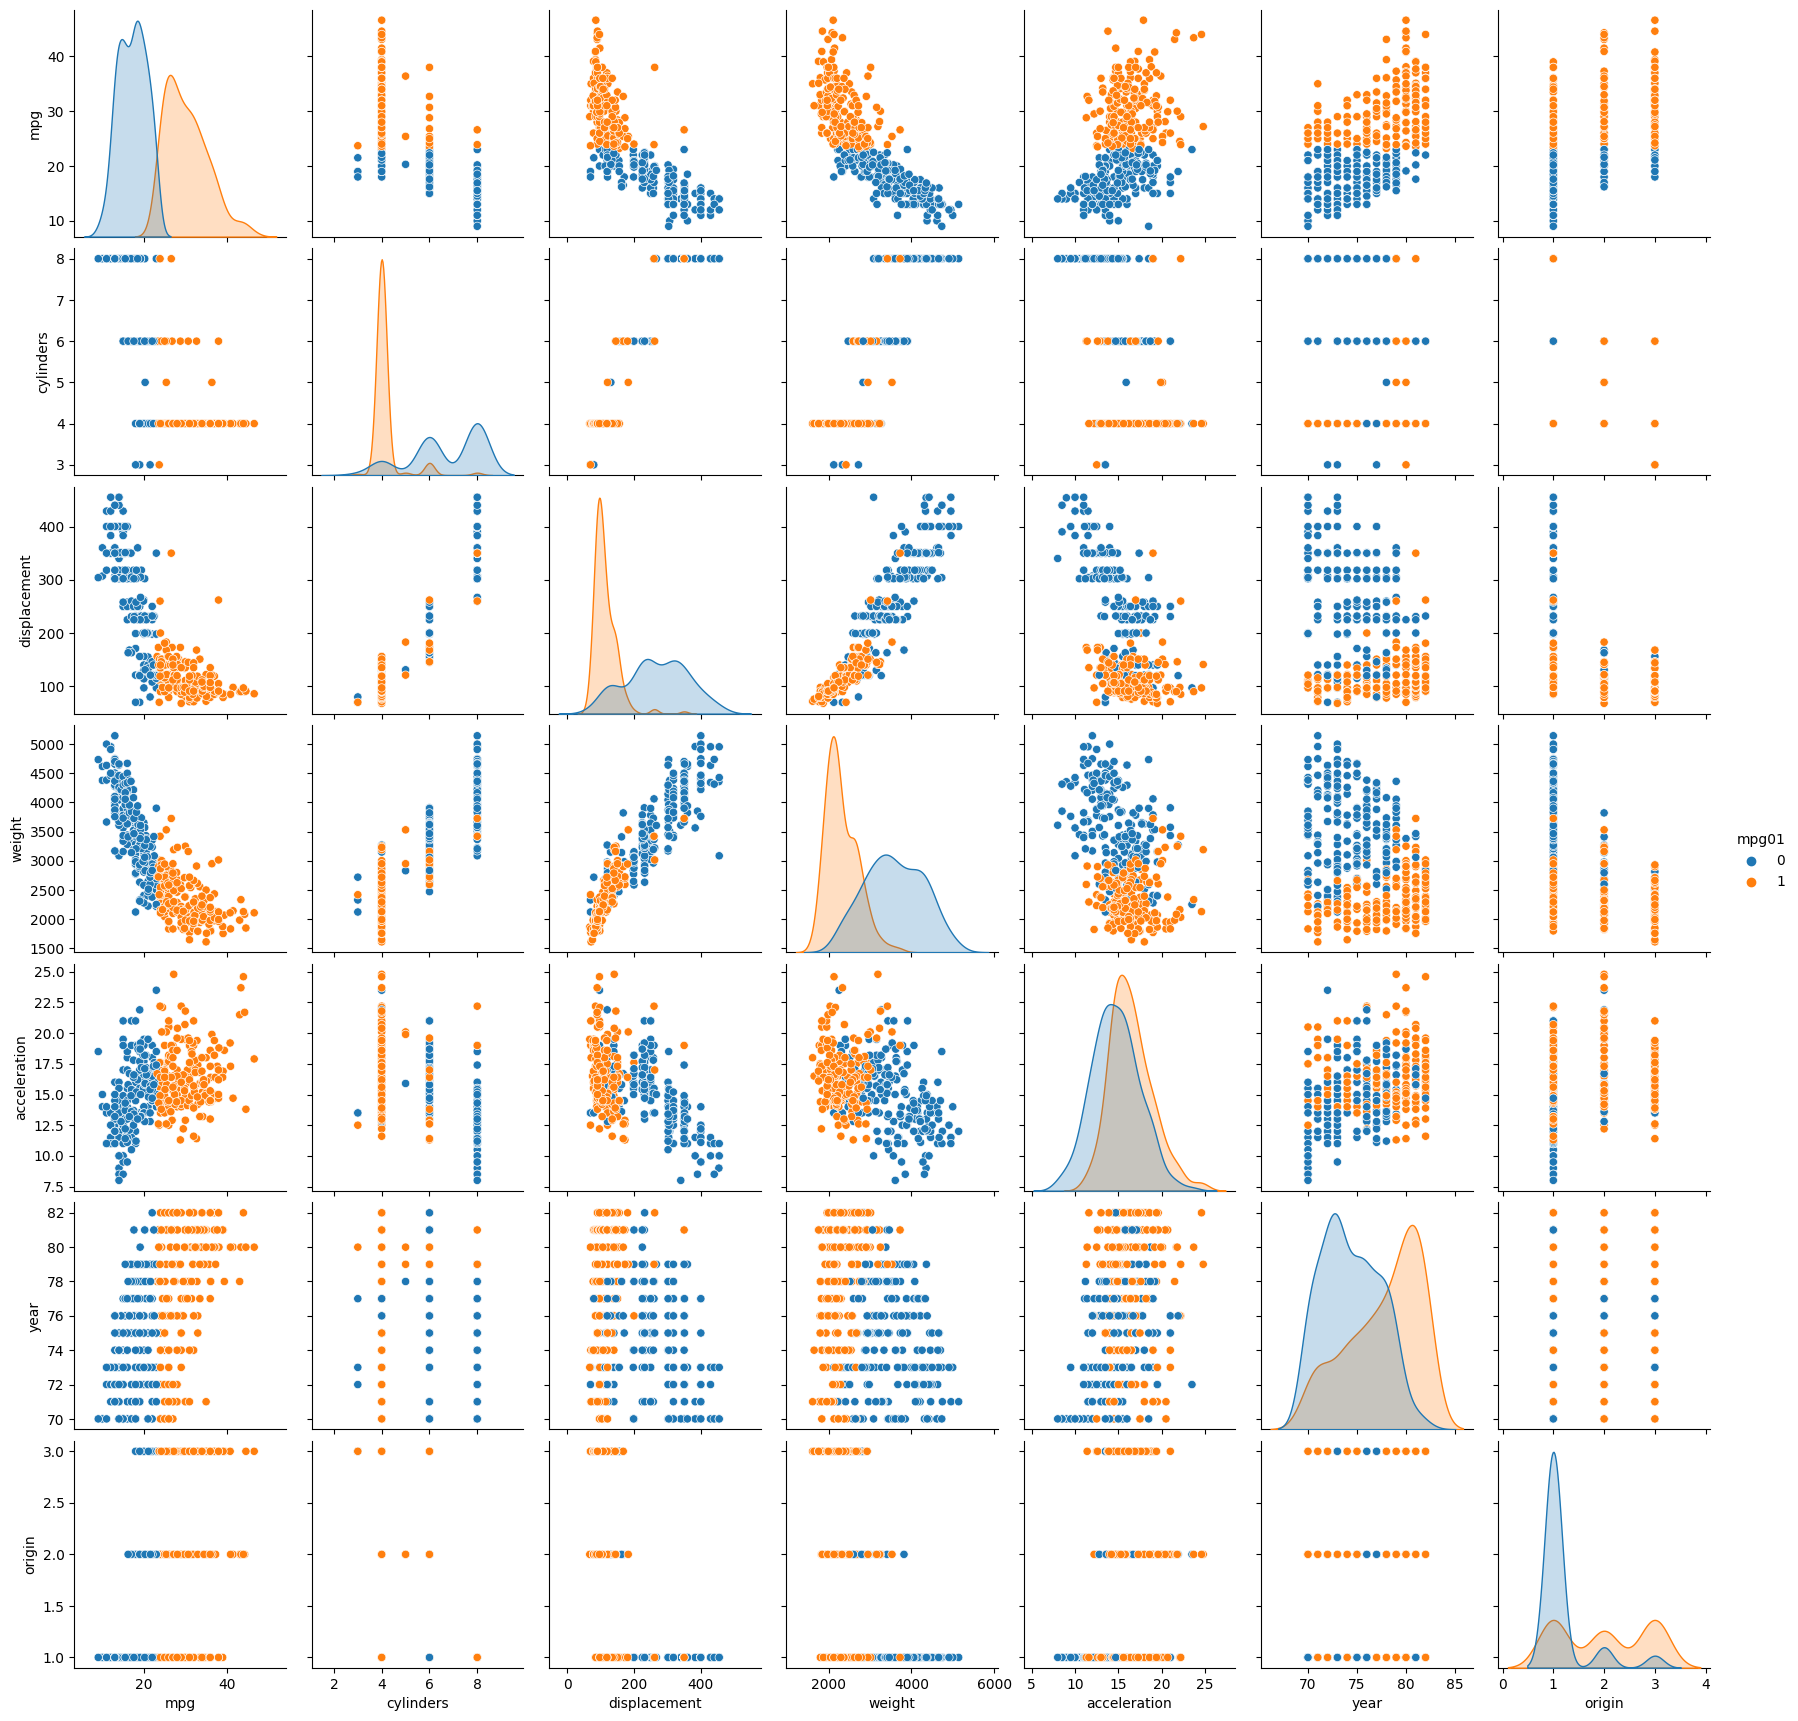

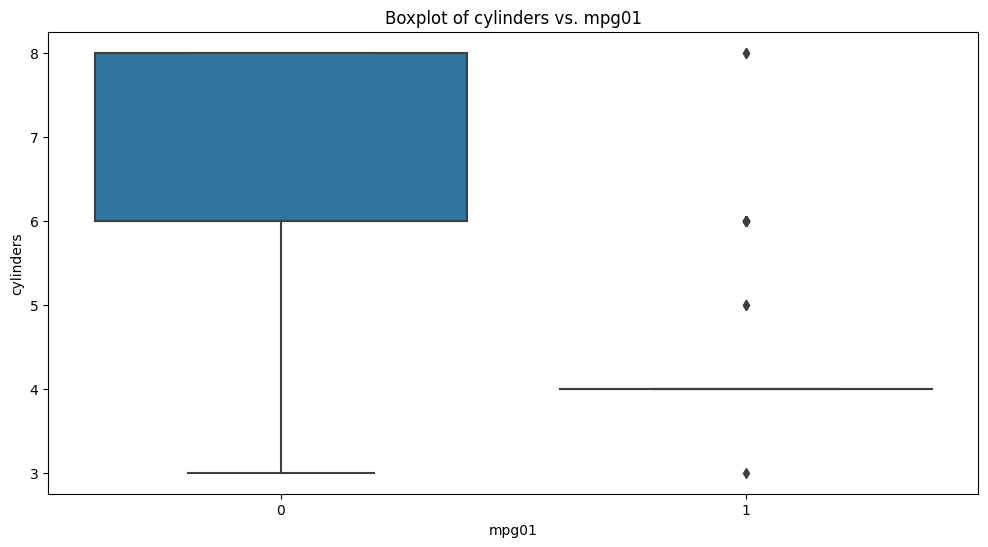

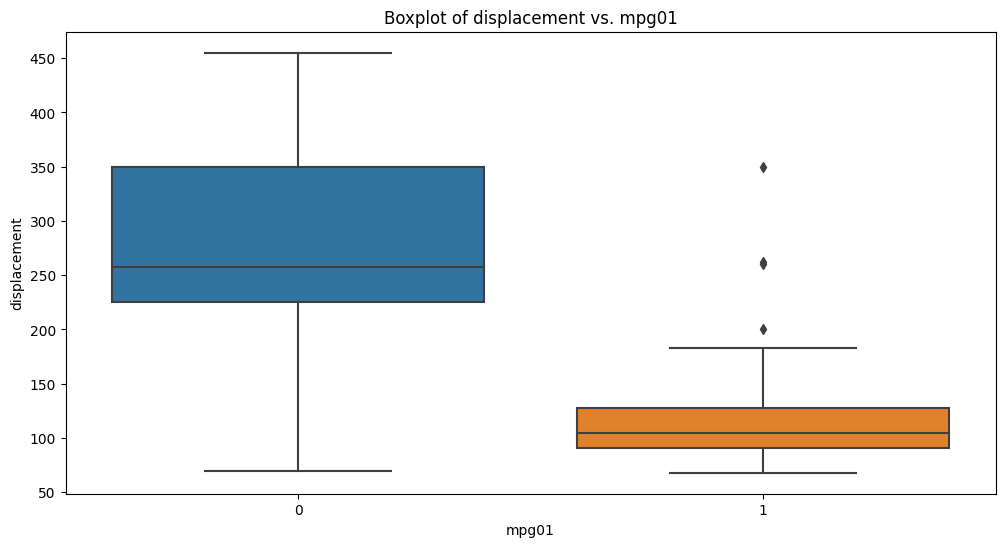

In [11]:
# Scatterplot matrix
sns.pairplot(Auto, hue='mpg01')
plt.show()

# Boxplot of numerical features vs. mpg01
plt.figure(figsize=(12, 6))
sns.boxplot(x='mpg01', y='cylinders', data=Auto)
plt.title('Boxplot of cylinders vs. mpg01')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='mpg01', y='displacement', data=Auto)
plt.title('Boxplot of displacement vs. mpg01')
plt.show()



(c) Split the data into a training set and a test set.

In [14]:
X = Auto.drop('mpg01', axis=1)  
y = Auto['mpg01'] 

#(80%) and  (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#try this with 70% and 30%

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtaine

In [34]:
# Assuming you have X_train and y_train prepared
# Replace 'feature1', 'feature2', 'feature3' with the actual feature names you identified in step (b)
selected_features = ['cylinders', 'acceleration']

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the LDA model on the training data using the selected features
lda.fit(X_train[selected_features], y_train)

# Predict the target variable on the test data using the selected features
y_pred = lda.predict(X_test[selected_features])


(b). What is the test error of the model obtained?

In [35]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Calculate the test error (misclassification rate)
test_error = 1 - accuracy

# Print the test error
print(f'Test Error: {test_error:.4f}')


Test Error: 0.1375


(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [36]:
# Assuming you have X_train and y_train prepared
# Replace 'feature1', 'feature2', 'feature3' with the actual feature names you identified in step (b)
selected_features = ['cylinders','acceleration' ]

# Create a QDA classifier
qda = QuadraticDiscriminantAnalysis()

# Fit the QDA model on the training data using the selected features
qda.fit(X_train[selected_features], y_train)

# Predict the target variable on the test data using the selected features
y_pred_qda = qda.predict(X_test[selected_features])


What is the test error of the model obtained?

In [37]:
# Calculate the accuracy of the QDA model on the test data
accuracy_qda = accuracy_score(y_test, y_pred_qda)

# Calculate the test error (misclassification rate) for QDA
test_error_qda = 1 - accuracy_qda

# Print the test error for QDA
print(f'Test Error (QDA): {test_error_qda:.4f}')


Test Error (QDA): 0.1375


(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b).

In [39]:
# Assuming you have X_train and y_train prepared
# Replace 'feature1', 'feature2', 'feature3' with the actual feature names you identified in step (b)
selected_features = ['cylinders','acceleration']

# Create a logistic regression classifier
logistic_reg = LogisticRegression()

# Fit the logistic regression model on the training data using the selected features
logistic_reg.fit(X_train[selected_features], y_train)

# Predict the target variable on the test data using the selected features
y_pred_logistic = logistic_reg.predict(X_test[selected_features])


What is the test error of the model obtained?

In [40]:
# Calculate the accuracy of the logistic regression model on the test data
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Calculate the test error (misclassification rate) for logistic regression
test_error_logistic = 1 - accuracy_logistic

# Print the test error for logistic regression
print(f'Test Error (Logistic Regression): {test_error_logistic:.4f}')


Test Error (Logistic Regression): 0.1625


(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [42]:
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Calculate the test error (misclassification rate) for logistic regression
test_error_logistic = 1 - accuracy_logistic

# Print the test error for logistic regression
print(f'Test Error (Logistic Regression): {test_error_logistic:.4f}')


Test Error (Logistic Regression): 0.1625


(g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [44]:
selected_features = ['cylinders','acceleration']

# Create a Gaussian Naive Bayes classifier
naive_bayes = GaussianNB()

# Fit the Naive Bayes model on the training data using the selected features
naive_bayes.fit(X_train[selected_features], y_train)

# Predict the target variable on the test data using the selected features
y_pred_naive_bayes = naive_bayes.predict(X_test[selected_features])

In [45]:
# Calculate the accuracy of the Naive Bayes model on the test data
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

# Calculate the test error (misclassification rate) for Naive Bayes
test_error_naive_bayes = 1 - accuracy_naive_bayes

# Print the test error for Naive Bayes
print(f'Test Error (Naive Bayes): {test_error_naive_bayes:.4f}')


Test Error (Naive Bayes): 0.1375


(h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [47]:
# Assuming you have X_train and y_train prepared
# Replace 'feature1', 'feature2', 'feature3' with the actual feature names you identified in step (b)
selected_features = ['cylinders','acceleration']

# Define a list of K values to experiment with
k_values = [1, 3, 5, 7, 9]  # You can modify this list as needed

# Create a dictionary to store test errors for different K values
test_errors = {}

# Iterate over different K values
for k in k_values:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the KNN model on the training data using the selected features
    knn.fit(X_train[selected_features], y_train)
    
    # Predict the target variable on the test data using the selected features
    y_pred_knn = knn.predict(X_test[selected_features])
    
    # Calculate the accuracy of the KNN model on the test data
    accuracy_knn = accuracy_score(y_test, y_pred_knn)
    
    # Calculate the test error (misclassification rate) for the current K value
    test_error_knn = 1 - accuracy_knn
    
    # Store the test error in the dictionary
    test_errors[k] = test_error_knn

# Print the test errors for different K values
for k, test_error in test_errors.items():
    print(f'Test Error (K={k}): {test_error:.4f}')


Test Error (K=1): 0.1875
Test Error (K=3): 0.1375
Test Error (K=5): 0.1375
Test Error (K=7): 0.1375
Test Error (K=9): 0.1250
